In [265]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'

In [266]:
# Problem 1(a)
# input-->{r=1.theta,phi}
# {r,theta,phi}-->{1,theta,phi}
# {x,y,z}-->{sin(theta)cos(phi),sin(theta)sin(phi),cos(theta)}
# {rho,psi,z}-->{sin(theta),theta,cos(theta)}

def sphere2cart(theta, phi, r=1):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z
def sphere2cylind(theta, phi, r=1):
    rho = r * np.sin(theta)
    psi = phi
    z = r * np.cos(theta)
    return rho, psi, z

def orthonormal(theta,phi,r=1,A=10):
    # For r_hat 
    a= np.array(sphere2cart(theta,phi)) /A
    # For theta_hat
    b=np.array([
        np.cos(theta)*np.cos(phi),
        np.cos(theta)*np.sin(phi),
        -np.sin(theta)])/A
    # For phi_hat 
    c=np.array([
        -np.sin(phi),
        np.cos(phi),
        0])/A
    return a,b,c

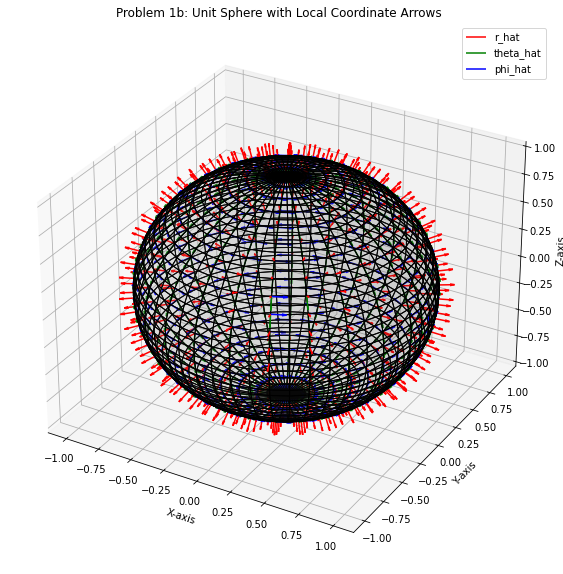

In [267]:
# Prob 1(b)

theta = np.linspace(0, np.pi, 50)  # Reduced resolution for clarity
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

# Convert to Cartesian coordinates for plotting the sphere
x, y, z = sphere2cart(theta, phi)

# Create a figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='grey', edgecolor='k', alpha=0.1)

# Select a subset of points for quiver (to avoid overcrowding)
for i in range(0, theta.shape[0], 2):  
    for j in range(0, theta.shape[1], 2):
        # Compute base position
        x0, y0, z0 = sphere2cart(theta[i, j], phi[i, j])
        
        # Compute orthonormal unit vectors
        r_hat, theta_hat, phi_hat = orthonormal(theta[i, j], phi[i, j],A=1)

        # Plot arrows using quiver
        ax.quiver(x0, y0, z0, *r_hat, color='r', length=0.1, label="r_hat" if i==0 and j==0 else "")
        ax.quiver(x0, y0, z0, *theta_hat, color='g', length=0.1, normalize=0, label="theta_hat" if i==0 and j==0 else "")
        ax.quiver(x0, y0, z0, *phi_hat, color='b', length=0.1, normalize=0, label="phi_hat" if i==0 and j==0 else "")

# Labels and settings
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Problem 1b: Unit Sphere with Local Coordinate Arrows")
ax.legend()

# Show plot
plt.show()



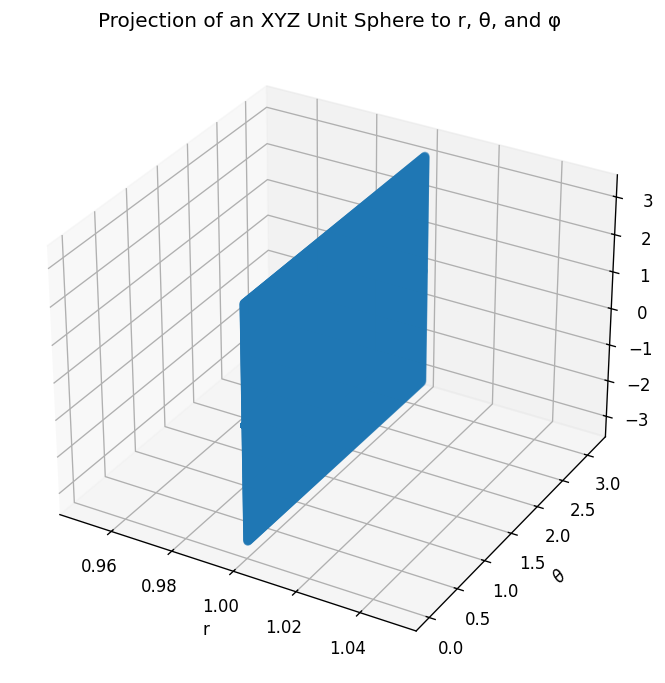

In [268]:
# prob 1(c)

def cartesian_to_spherical(x, y, z):
    # Compute r
    r = np.sqrt(x**2 + y**2 + z**2)
    
    # Compute theta
    if z > 0:
        theta = np.arctan(np.sqrt(x**2 + y**2) / z)
    elif z < 0:
        theta = np.pi + np.arctan(np.sqrt(x**2 + y**2) / z)
    elif z == 0 and (x**2 + y**2) != 0:
        theta = np.pi / 2
    else:
        theta = 0  # Undefined if x = y = z = 0
    
    # Compute phi
    if x > 0:
        phi = np.arctan(y / x)
    elif x < 0 and y >= 0:
        phi = np.arctan(y / x) + np.pi
    elif x < 0 and y < 0:
        phi = np.arctan(y / x) - np.pi
    elif x == 0 and y > 0:
        phi = np.pi / 2
    elif x == 0 and y < 0:
        phi = -np.pi / 2
    else:
        phi = 0  # Undefined if x = y = 0
    
    return r, theta, phi

def sphere2cart(theta, phi):
    """Generate Cartesian coordinates of a unit sphere"""
    theta, phi = np.meshgrid(theta, phi)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x.flatten(), y.flatten(), z.flatten()

# Define mesh size and generate spherical coordinates
mesh_size = 200
theta_vals = np.linspace(0, np.pi, mesh_size)
phi_vals = np.linspace(0, 2 * np.pi, mesh_size)

# Convert to Cartesian coordinates
x, y, z = sphere2cart(theta_vals, phi_vals)

# Convert Cartesian to Spherical coordinates
r = np.ones(len(x))  # r is always 1 for a unit sphere
theta = np.zeros(len(x))
phi = np.zeros(len(x))

for i in range(len(x)):
    temp1, temp2, temp3 = cartesian_to_spherical(x[i], y[i], z[i])
    theta[i] = temp2
    phi[i] = temp3


# Plot in 3D
fig = plt.figure(figsize=(10, 7),dpi=120)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r, theta, phi, marker='o')

# Labels
ax.set_xlabel("r")
ax.set_ylabel(r"$\theta$")
ax.set_zlabel(r"$\phi$")
ax.set_title("Projection of an XYZ Unit Sphere to r, θ, and φ")

plt.show()


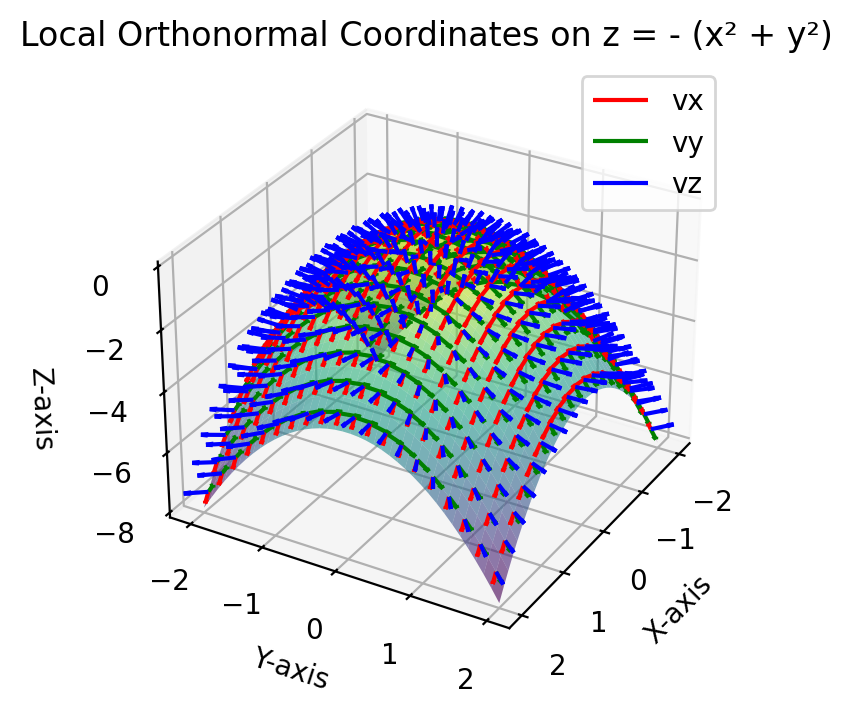

In [269]:
# Prob 1(d)

def f(x, y):
    """Define the general surface function."""
    return -(x**2 + y**2)

def compute_local_coordinates(X, Y, Z):
    """
    Compute local orthonormal coordinates at each (X, Y, Z) point on the surface.

    Parameters:
    - X, Y: Meshgrid arrays for x and y coordinates.
    - Z: Surface height values (Z = f(X, Y)).

    Returns:
    - vx, vy: Tangent vectors in x and y directions.
    - vz: Normal vector.
    - Flattened X, Y, Z for quiver plotting.
    """
    # Compute step sizes
    dx = X[0, 1] - X[0, 0]  # Grid spacing in x-direction
    dy = Y[1, 0] - Y[0, 0]  # Grid spacing in y-direction

    # Compute numerical gradients
    dZ_dx = np.gradient(Z, dx, axis=1)  # Partial derivative w.r.t x
    dZ_dy = np.gradient(Z, dy, axis=0)  # Partial derivative w.r.t y

    # Construct tangent vectors in x and y directions
    vx = np.stack((np.ones_like(dZ_dx), np.zeros_like(dZ_dx), dZ_dx), axis=-1)  # Tangent along x
    vy = np.stack((np.zeros_like(dZ_dy), np.ones_like(dZ_dy), dZ_dy), axis=-1)  # Tangent along y

    # Compute the normal vector using the cross product
    vz = np.cross(vx, vy)

    # Normalize vectors to make them unit vectors
    vx /= np.linalg.norm(vx, axis=-1, keepdims=True)
    vy /= np.linalg.norm(vy, axis=-1, keepdims=True)
    vz /= np.linalg.norm(vz, axis=-1, keepdims=True)

    return vx, vy, vz, X, Y, Z

def visualize():
    """Plot the surface and local coordinate frames."""
    mesh = 40  # Number of grid points
    step = 2  # Step size for quiver plotting to reduce clutter

    x = np.linspace(-2, 2, mesh)
    y = np.linspace(-2, 2, mesh)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # Compute local coordinate frames
    vx, vy, vz, X, Y, Z = compute_local_coordinates(X, Y, Z)

    # Create figure
    fig = plt.figure( dpi=200)
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)

    # Select points for quiver to avoid overcrowding
    X_sample, Y_sample, Z_sample = X[::step, ::step], Y[::step, ::step], Z[::step, ::step]
    vx_sample, vy_sample, vz_sample = vx[::step, ::step], vy[::step, ::step], vz[::step, ::step]

    # Flatten for quiver plotting
    X_flat, Y_flat, Z_flat = X_sample.flatten(), Y_sample.flatten(), Z_sample.flatten()
    vx_flat, vy_flat, vz_flat = vx_sample.reshape(-1, 3), vy_sample.reshape(-1, 3), vz_sample.reshape(-1, 3)

    # Plot quiver arrows
    ax.quiver(X_flat, Y_flat, Z_flat, vx_flat[:, 0], vx_flat[:, 1], vx_flat[:, 2], color='r', length=0.3, label="vx")
    ax.quiver(X_flat, Y_flat, Z_flat, vy_flat[:, 0], vy_flat[:, 1], vy_flat[:, 2], color='g', length=0.3, label="vy")
    ax.quiver(X_flat, Y_flat, Z_flat, vz_flat[:, 0], vz_flat[:, 1], vz_flat[:, 2], color='b', length=0.3, label="vz")

    # Labels and settings
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("Local Orthonormal Coordinates on z = - (x² + y²)")
    ax.legend()

    # Adjust view angle
    ax.view_init(elev=30, azim=30)

    # Show the plot
    plt.show()

# Run the visualization
visualize()


check the norm [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


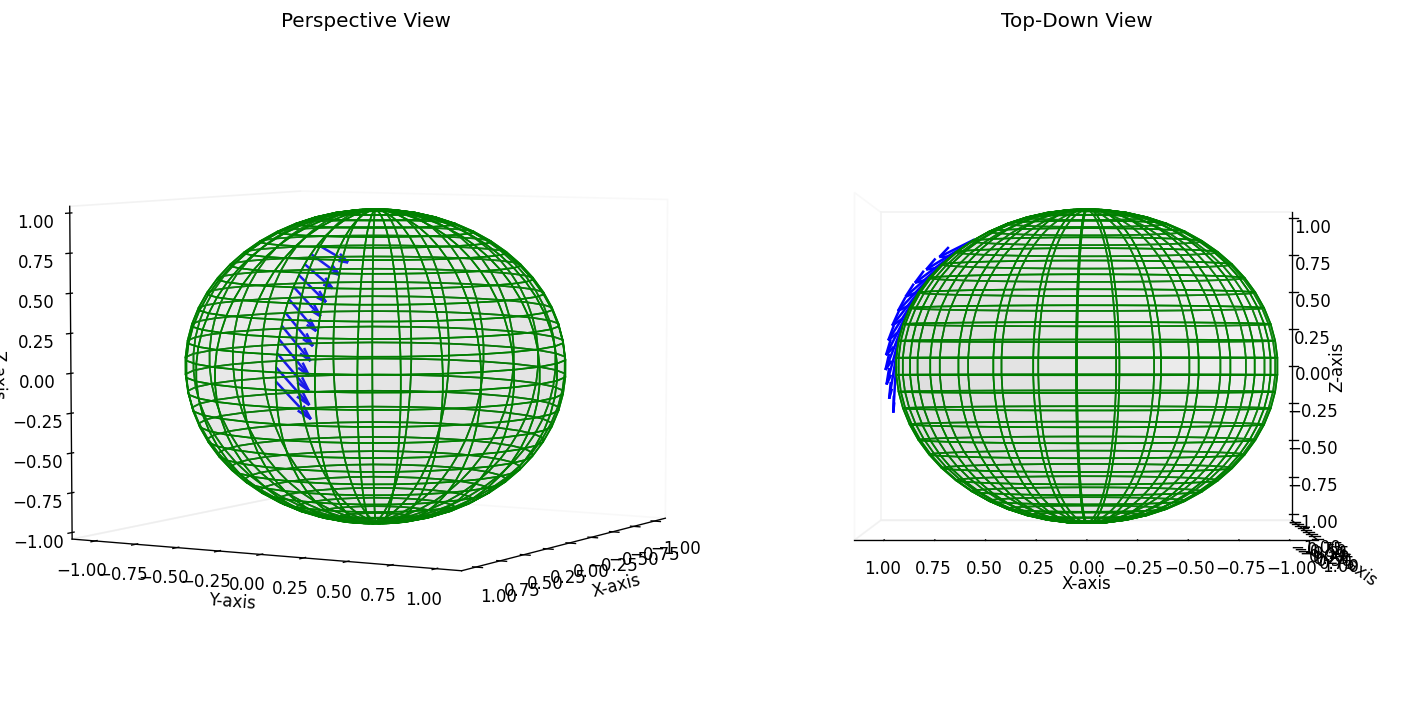

In [270]:
# Prob 1(e)
def sphere2cart(theta, phi, r=1):
    """Convert spherical coordinates (theta, phi) to Cartesian (x, y, z)."""
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

# Generate unit sphere mesh
mesh = 30
theta = np.linspace(0, np.pi, mesh)  # Polar angle
phi = np.linspace(0, 2 * np.pi, mesh)  # Azimuthal angle
Theta, Phi = np.meshgrid(theta, phi)  # Create 2D grid
X, Y, Z = sphere2cart(Theta, Phi)  # Convert to Cartesian coordinates

# Points to highlight along phi=0
theta_position = np.linspace(np.pi/5, np.pi/2, 12)  
phi_highlight = np.zeros_like(theta_position)  

# Convert highlight points to Cartesian
X_highlight, Y_highlight, Z_highlight = sphere2cart(theta_position, phi_highlight)

# Define vector transport parameters
a = 0.5  
beta = 0.8  
theta_0 = np.pi / 5 
Ux_norm = []
Uy_norm = []
Uz_norm = []
for i in range(len(theta_position)):
    theta_i = theta_position[i]
    # Compute the transported vector components
    Ux_i = a * np.cos(theta_i) * np.cos(phi_highlight[i]) + beta * np.sin(theta_0) / np.sin(theta_i) * (-np.sin(phi_highlight[i]))
    Uy_i = a * np.cos(theta_i) * np.sin(phi_highlight[i]) + beta * np.sin(theta_0) / np.sin(theta_i) * np.cos(phi_highlight[i])
    Uz_i = -a * np.sin(theta_i)
    # Compute the normalization factor for this specific theta_i
    A_i = np.sqrt(Ux_i**2 + Uy_i**2 + Uz_i**2)
    # Normalize the vector
    Ux_norm.append(Ux_i / A_i )
    Uy_norm.append(Uy_i / A_i )
    Uz_norm.append(Uz_i / A_i )
# Convert lists to numpy arrays
Ux_norm = np.array(Ux_norm)
Uy_norm = np.array(Uy_norm)
Uz_norm = np.array(Uz_norm)
norm = Ux_norm**2 + Uy_norm**2 + Uz_norm**2
print('check the norm', norm)

fig = plt.figure(figsize=(12,6), dpi=120)  # Make it wider for side-by-side

# First subplot (Perspective View)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, color='lightgray', edgecolor='g', alpha=0.1)
ax1.quiver(X_highlight, Y_highlight, Z_highlight, Ux_norm, Uy_norm, Uz_norm, color='b', length=0.3, normalize=True)
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")
ax1.set_title("Perspective View")
ax1.view_init(elev=5, azim=30)
ax1.grid(False)  
ax1.xaxis.pane.fill = False  
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

# Second subplot (Top-Down View)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, color='lightgray', edgecolor='g', alpha=0.1)
ax2.quiver(X_highlight, Y_highlight, Z_highlight, Ux_norm, Uy_norm, Uz_norm, color='b', length=0.4, normalize=True)
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")
ax2.set_title("Top-Down View")
ax2.view_init(elev=0, azim=90)  # Directly from above
ax2.grid(False)  
ax2.xaxis.pane.fill = False  
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

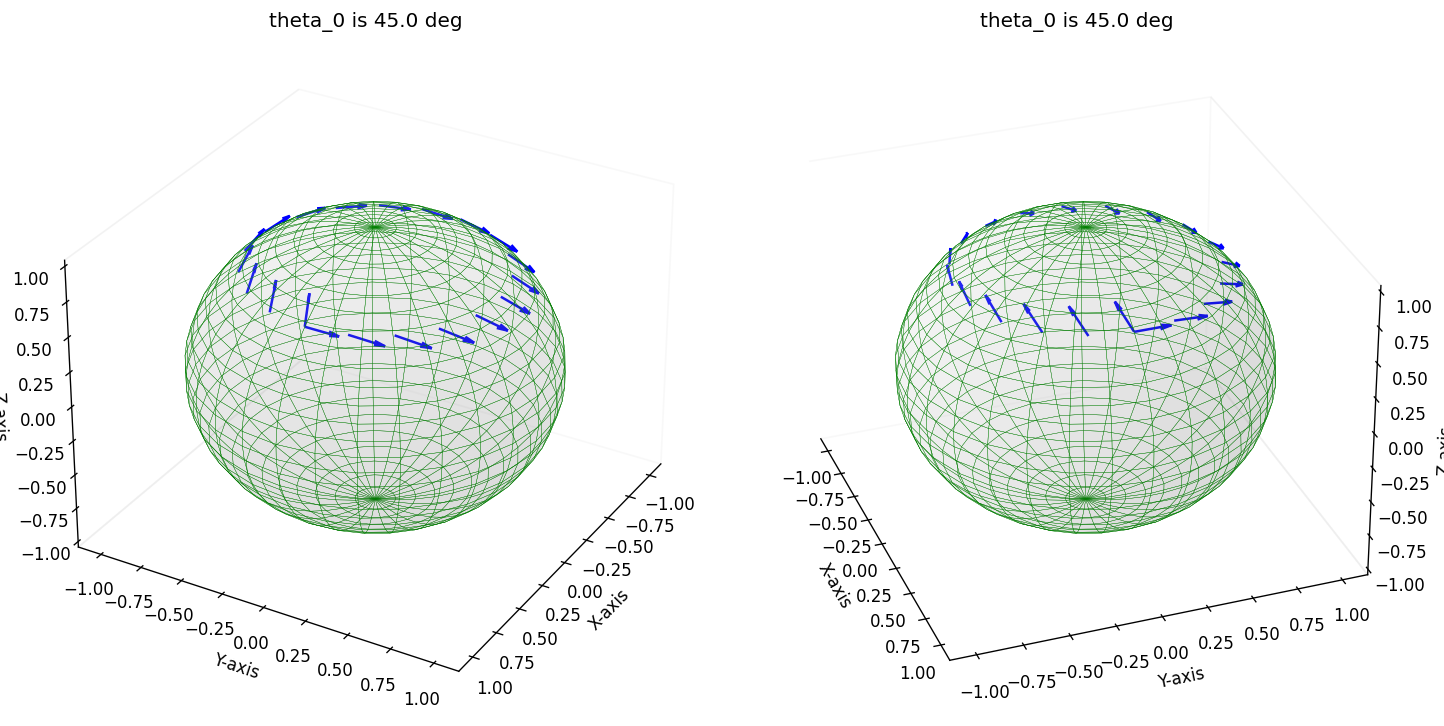

norm [0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005]


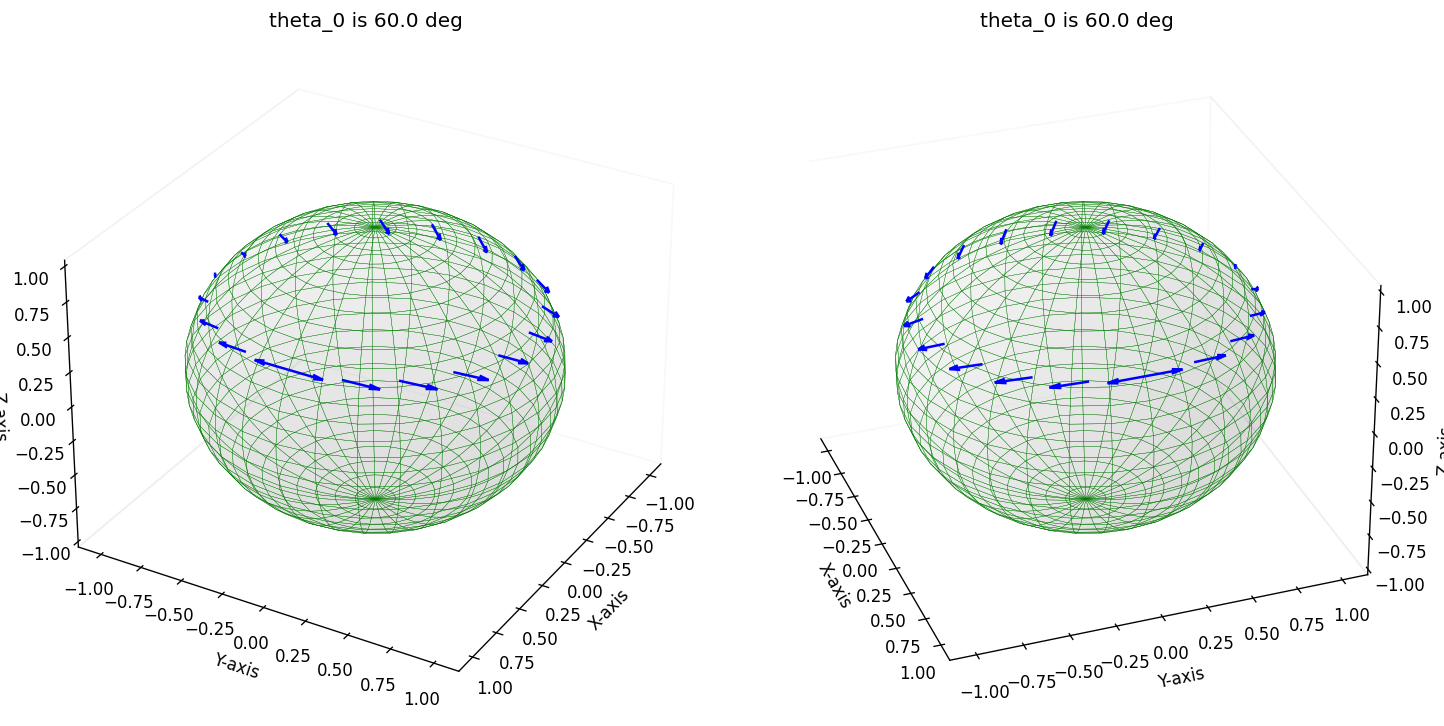

norm [0.0075 0.0075 0.0075 0.0075 0.0075 0.0075 0.0075 0.0075 0.0075 0.0075
 0.0075 0.0075 0.0075 0.0075 0.0075 0.0075 0.0075 0.0075 0.0075 0.0075]


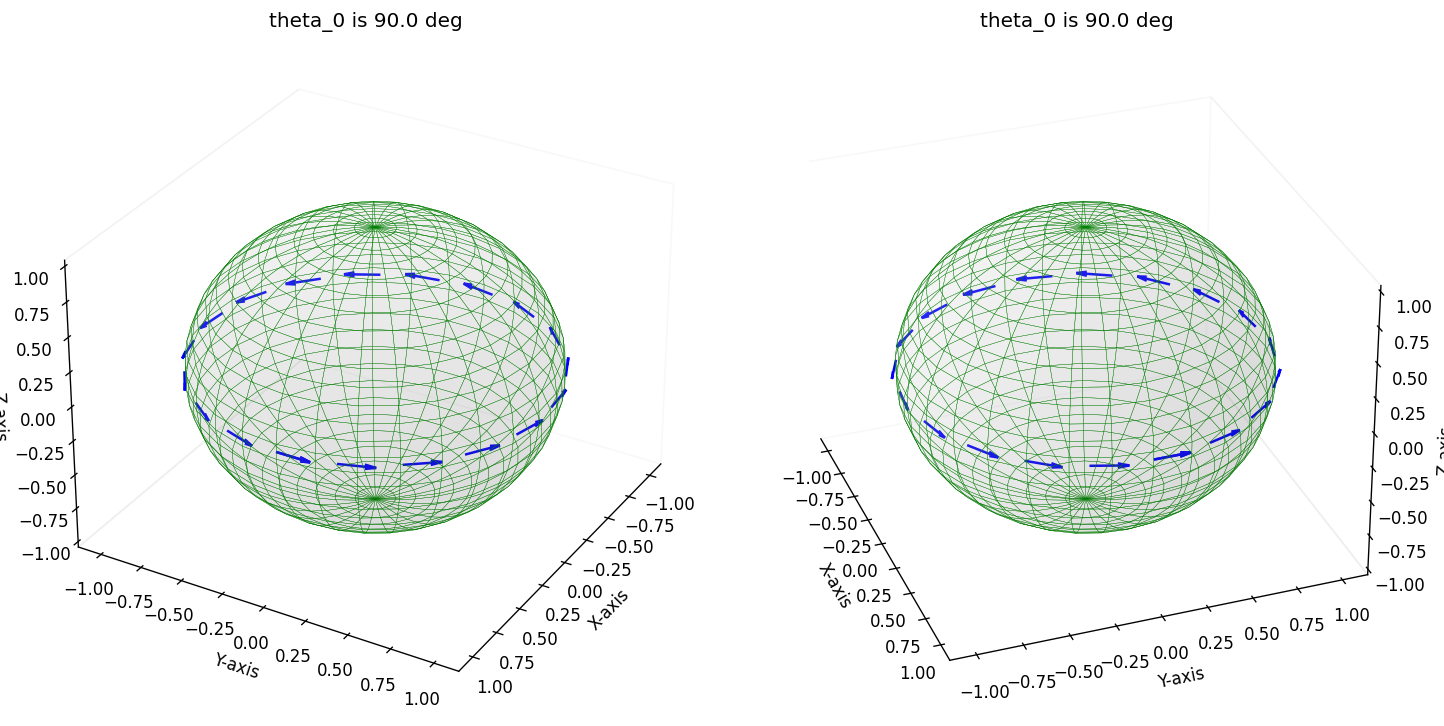

norm [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01]


In [271]:
# Prob 1(f)

def sphere2cart(theta, phi, r=1):
    """Convert spherical coordinates (theta, phi) to Cartesian (x, y, z)."""
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

# Generate unit sphere mesh
mesh = 30
theta = np.linspace(0, np.pi, mesh)  # Polar angle
phi = np.linspace(0, 2 * np.pi, mesh)  # Azimuthal angle
Theta, Phi = np.meshgrid(theta, phi)  # Create 2D grid
X, Y, Z = sphere2cart(Theta, Phi)  # Convert to Cartesian coordinates

# Points to highlight along theta = theta_0
theta_0 = 45
for theta_0 in [45,60,90]:
    theta_0 = theta_0/180*np.pi
    phi_highlight = np.linspace(0, np.pi*2, 20)  
    theta_highlight = np.zeros_like(phi_highlight)+theta_0
    X_highlight, Y_highlight, Z_highlight = sphere2cart(theta_highlight, phi_highlight)

    # Define vector transport parameters
    v_phi_0 = 0.1
    v_theta_0 = 0.1

    # Vector along transport
    v_phi = v_phi_0*np.cos(phi*np.cos(theta))
    v_theta = v_theta_0*np.sin(phi*np.cos(theta))*np.sin(theta)

    # Expand it in xyz for plotting (v_phi,v_theta)
    v_theta_xyz = lambda theta,phi: np.array([
        v_theta_0*np.sin(phi*np.cos(theta))*np.sin(theta)*np.cos(theta)*np.cos(phi),
        v_theta_0*np.sin(phi*np.cos(theta))*np.sin(theta)*np.cos(theta)*np.sin(phi),
        v_theta_0*np.sin(phi*np.cos(theta))*np.sin(theta)*(-np.sin(theta))])

    v_phi_xyz = lambda theta, phi: np.array([
        v_phi_0 * np.cos(phi * np.cos(theta)) * np.sin(theta)*(-np.sin(phi)), 
        v_phi_0 * np.cos(phi * np.cos(theta)) * np.sin(theta)*np.cos(phi),   
        np.zeros_like(phi)  ])

    vector_arrow = v_theta_xyz(theta_highlight,phi_highlight)+v_phi_xyz(theta_highlight,phi_highlight)
    a, b, c = vector_arrow

    fig = plt.figure(figsize=(12,6), dpi=120)  # Make it wider for side-by-side
    # First subplot (Perspective View)
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, color='lightgray', edgecolor='g', alpha=0.1,linewidth=0.2)
    ax1.quiver(X_highlight, Y_highlight, Z_highlight,a, b, c, color='b', length=0.2, normalize=True)
    ax1.set_xlabel("X-axis")
    ax1.set_ylabel("Y-axis")
    ax1.set_zlabel("Z-axis")
    ax1.set_title(f"theta_0 is {theta_0/(np.pi)*180} deg")
    ax1.view_init(elev=30, azim=30)
    ax1.grid(False)  
    ax1.xaxis.pane.fill = False  
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False

    # Second subplot (Top-Down View)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(X, Y, Z, color='lightgray', edgecolor='g', alpha=0.1,linewidth=0.2)
    ax2.quiver(X_highlight, Y_highlight, Z_highlight, a, b, c, color='b', length=0.2, normalize=True)
    ax2.set_xlabel("X-axis")
    ax2.set_ylabel("Y-axis")
    ax2.set_zlabel("Z-axis")
    ax2.set_title(f"theta_0 is {theta_0/(np.pi)*180} deg")
    ax2.view_init(elev=30, azim=-20)
    ax2.grid(False)  
    ax2.xaxis.pane.fill = False  
    ax2.yaxis.pane.fill = False
    ax2.zaxis.pane.fill = False

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
    print('norm',a**2+b**2+c**2)

In [272]:
# prob 1 (g)

We define the angle $\alpha$  between two vectors $ V $ and $ V'$ in a general metric space as:

$$
\cos( \alpha ) = \frac{ g(V, V') }{ ||V|| ||V'|| }
$$

Expanding this using the metric tensor  $g_{\mu \nu} $:

$$
\cos(\alpha) = \frac{ g_{\mu\nu} V^\mu V'^\nu }{ \sqrt{ g_{\rho\sigma} V^\rho V^\sigma } \sqrt{ g_{\rho\sigma} V'^\rho V'^\sigma } }
$$

which simplifies to:

$$
\cos(\alpha) = \cos(2\pi \cos(\theta))
$$

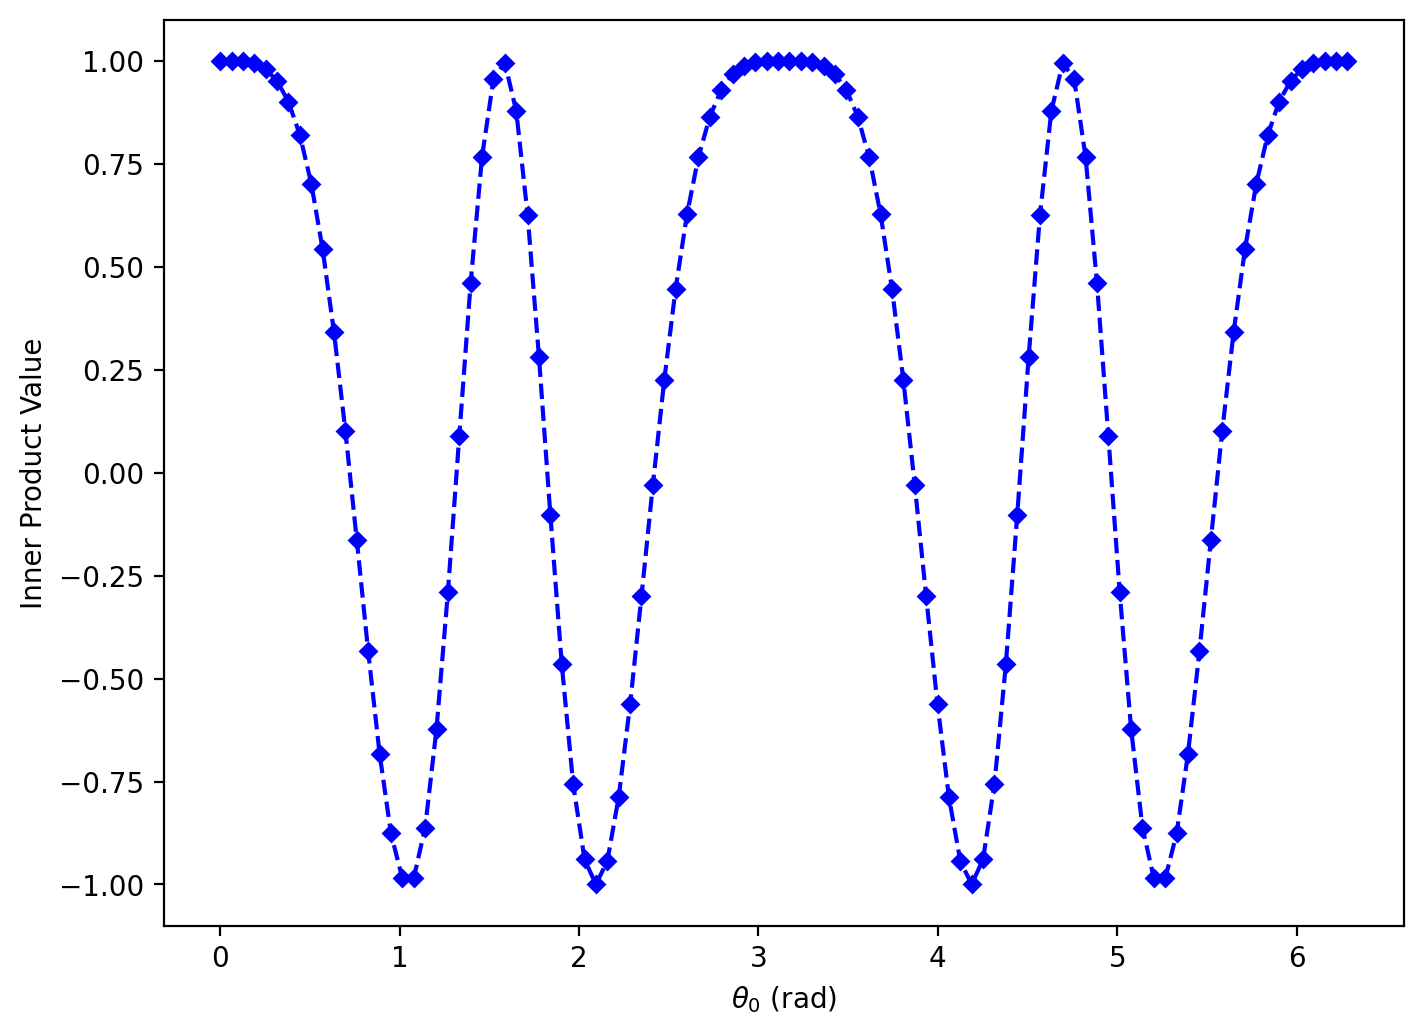

In [273]:

def in_product(theta):
    return np.cos(2*np.pi*np.cos(theta))
theta_0 = np.linspace(0, 2*np.pi, 100)
inner_product_values = in_product(theta_0)

plt.figure(figsize=(8, 6), dpi=200)
plt.plot(theta_0, inner_product_values, marker='D', linestyle="--", color='b',markersize=4)

plt.xlabel(r'$\theta_0$ (rad)')
plt.ylabel('Inner Product Value')

plt.show()
